# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

# (1) Explore the data

In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#define function to bold text

def bold_text(text):
  return "\033[1m" + text + "\033[0m"

# Import the dataset from a CSV file
original_dataset = pd.read_csv('Mobile_Price_Data.csv')

# Display the first few rows of the dataset to understand its structure
print(bold_text("First few rows of the dataset:"))
original_dataset.head()



First few rows of the dataset:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


In [71]:
# Display statistical descriptions of the dataset to get insights into the numerical features
print(bold_text("Statistical summary of the dataset:"))
original_dataset.describe()

Statistical summary of the dataset:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,...,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,1999.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.035018,0.501601,140.249000,4.520500,...,645.108000,1251.566783,2124.218609,12.306500,5.767000,11.011000,0.761381,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.142986,0.288411,35.399655,2.287837,...,443.780811,432.301505,1085.003435,4.213245,4.356398,5.463955,0.426346,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.500000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [72]:
#check if there any null values in data set

nan_values = original_dataset.isnull().sum()
nan_count = original_dataset.isnull().sum().sum()
original_dataset_length = len(original_dataset)

print(bold_text('Original Dataset Row Count:'), original_dataset_length)
print(bold_text('Total of NaN values:'), nan_count)

# Display NaN values per column for detailed analysis
print("NaN Value")
nan_values

Original Dataset Row Count: 2000
Total of NaN values: 5
NaN Value


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [73]:
# Replace missing values with the median for each column
analysis_dataset = original_dataset.fillna(original_dataset.median())
        
# Check again for missing values to confirm all have been replaced
missing_values_after = analysis_dataset.isnull().sum()

# Display the status of missing values after replacement to ensure there are no remaining NaNs
print(bold_text("Analysis dataset"))
print(missing_values_after)

Analysis dataset
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# (2) Study the correlation

In [74]:
# Calculate the correlation matrix for the analysis dataset
correlation_data = analysis_dataset.corr()

price_correlations = correlation_matrix['price_range'].sort_values(ascending=False)
print(price_correlations)

price_range      1.000000
ram              0.917039
battery_power    0.200723
px_width         0.165668
px_height        0.148858
int_memory       0.044169
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000155
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


# Correlations explanation: 

RAM has a very high correlation of about 0.92 with the 'price_range', making it a strong predictor of higher phone prices. Other features like 'battery_power', 'px_width', and 'px_height' also positively correlate, suggesting that better battery life and higher screen resolutions typically indicate more expensive models.

However, features such as 'int_memory', 'sc_w', and 'pc' show lower correlations, affecting the price less significantly. Features with negative correlations like 'mobile_wt', 'touch_screen', and 'clock_speed' suggest that heavier phones might be cheaper and advanced features do not always lead to higher prices.

# (3) Preparing data by spliting

In [75]:
# Define the feature set and the target variable
x = analysis_dataset[['ram', 'battery_power', 'px_width', 'px_height']]
y = analysis_dataset['price_range']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=142)

# (4) Train a logistic regression mode

In [76]:
# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_model.fit(x_train, y_train)


# Predict the price range on the test set
train_predictions = logistic_model.predict(x_train)
test_predictions = logistic_model.predict(x_test)

# Calculate the accuracy of the model
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Training set accuracy:", accuracy_train)
print("Test set accuracy:", accuracy_test)

Training set accuracy: 0.960625
Test set accuracy: 0.96


## The Logistic Regression Model Explanation:
The logistic regression model displays strong performance, achieving an accuracy of about 96.06% on the training set and 96% on the testing set. The similar accuracy rates between the training and testing datasets suggest that the model generalizes well. The proximity of the test accuracy to the training accuracy demonstrates that the model is effectively balanced, avoiding both overfitting and underfitting, and is reliable in predicting outcomes on new data.

# (5) Train a K-Nearest Neighbors (KNN) model

In [77]:
# Create a KNN model with an initial choice of k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(x_train, y_train)

# Predict the price range on both the training and test sets using KNN
train_knn_predictions = knn_classifier.predict(x_train)
test_knn_predictions = knn_classifier.predict(x_test)

# Calculate the accuracy of the KNN model on both the training and test datasets
accuracy_knn_train = accuracy_score(y_train, train_knn_predictions)
accuracy_knn_test = accuracy_score(y_test, test_knn_predictions)

# Print the accuracy results for the KNN classifier
print("Training set accuracy:", accuracy_knn_train)
print("Test set accuracy:", accuracy_knn_test)

Training set accuracy: 0.949375
Test set accuracy: 0.92


## K-Nearest Neighbors (KNN) Model Explanation:
For the K-Nearest Neighbors (KNN) model with a fixed k=5, the training accuracy was about 94.93%, and the test accuracy was slightly lower at 92%. This suggests that while the model with k=5 is performing adequately, there is potential for improvement. The gap in performance between the training and test sets indicates that the KNN model could benefit from additional tuning of its hyperparameters.

In [78]:
# Define the range of k values to test
k_range = {'n_neighbors': np.arange(1, 30)}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Set up GridSearchCV with 5-fold cross-validation to find the optimal k
knn_grid_search = GridSearchCV(knn_classifier, k_range, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
knn_grid_search.fit(x_train, y_train)

# Extract the best parameters, accuracy from CV, and the best model
optimal_k = knn_grid_search.best_params_['n_neighbors']
cv_best_accuracy = knn_grid_search.best_score_
optimal_knn_model = knn_grid_search.best_estimator_

# Use the best KNN model to predict on the test set
test_predictions_optimal = optimal_knn_model.predict(x_test)
test_accuracy_optimal = accuracy_score(y_test, test_predictions_optimal)

# Output the best k value and accuracies
print("Best k:", optimal_k)
print("Cross-validation best accuracy:", cv_best_accuracy)
print("Test set accuracy with best k:", test_accuracy_optimal)


Best k: 21
Cross-validation best accuracy: 0.9256250000000001
Test set accuracy with best k: 0.945


## K-Nearest Neighbors (KNN) Model and Hyperparameter Tuning Explanation:
At first, the KNN model with k=5 neighbors had a solid training accuracy of about 94.93% and a test accuracy of 92%. But when the hyperparameter k was adjusted using a grid search, the best value turned out to be k=21. This change increased the test accuracy to 94.5%. This improvement in test results highlights how crucial it is to fine-tune hyperparameters to enhance the model's performance. The best choice of 21 neighbors shows that using a wider range of neighbors can lead to more reliable generalization and predictions for this dataset. It also shows that KNN's effectiveness really depends on selecting the right k, and tweaking it can greatly boost the model's ability to predict accurately.

# (6) Tune the hyper-parameter K

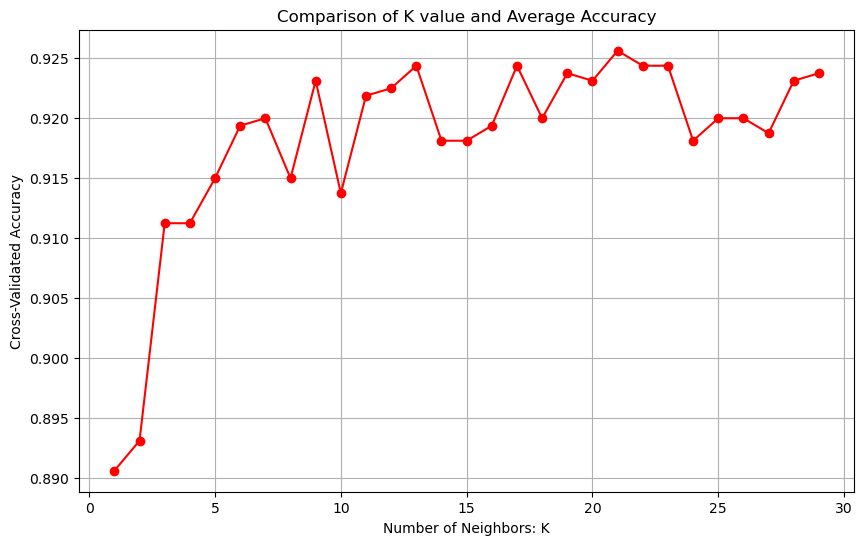

In [79]:
# Extract mean test scores for each k value tested in the GridSearchCV
mean_test_scores = grid_knn.cv_results_['mean_test_score']
k_values = np.arange(1, 30)

# Create a plot to visualize the relationship between k values and cross-validated accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-', color='red')  # Enhanced color name for clarity
plt.xlabel('Number of Neighbors: K')  # Label for x-axis
plt.ylabel('Cross-Validated Accuracy')  # Label for y-axis
plt.title('Comparison of K value and Average Accuracy')  # Title of the plot
plt.grid(True)  # Enable grid for better readability of the plot
plt.show()  # Display the plot


# Chart explanation:
The chart "Comparison of K value and Average Accuracy" shows how the K-Nearest Neighbors (KNN) model's accuracy changes with different values of K, the number of neighbors it uses to make predictions.

Starting with K at 1, we see that the model’s accuracy jumps up quickly as K increases to about 5, indicating that a very low K isn’t considering enough information for strong predictions. As K gets a little higher, the accuracy starts to go up and down a lot between K = 5 and K = 20. This means the model's performance is really sensitive to the exact K value in this range, maybe because of random noise in the data or how the points are laid out.

When K gets past 20, the ups and downs in the chart calm down, which shows that having more neighbors can help make the model's predictions more consistent and less affected by random variations. The best accuracy is at K = 21, making it the prime choice for this dataset and model.

In the beginning, with a very small K, the model is probably overfitting, paying too much attention to the training data’s noise. But as K gets bigger, the model might underfit as shown by a dip in accuracy until it balances out at K = 21. Though the chart doesn't show what happens if K keeps increasing, it’s likely that accuracy would start to fall off as the model begins to consider too many neighbors and becomes too general.

This chart is really useful for understanding the role of K in the model's performance and highlights the need to adjust K to suit the specific data you're working with to get the best prediction accuracy.

# Name: Kanrawee(Kara) Vorametphasuk 
Student ID: 48088544